In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = pd.read_csv('Reddit_Encoded.csv')
df.head()

,comment,hate_speech,lemmatized_comment,document_vector_flat
0,subsection retarded hungarians ohh boy brace l...,1,subsection retard hungarians ohh boy brace liv...,"0.014043219,-0.01809359,0.017145459,0.08062436..."
1,hiii just got work Foundation and grounding ma...,0,hiii just get work Foundation and ground mainl...,"-0.0030388932,-0.035133556,0.020659983,0.07383..."
2,wow guess soyboys every country,0,wow guess soyboys every country,"0.017362628,0.005587179,0.0297773,0.109146975,..."
3,owen benjamins soyboy song goes every country ...,0,owen benjamins soyboy song go every country amaze,"0.018085241,0.0011954829,2.8959475e-05,0.07601..."
4,yall hear sumn means live small town rn for w...,0,yall hear sumn mean live small town rn for wor...,"0.023993038,-0.00060867134,0.005239945,0.05989..."


### Train and Test Splitting

In [2]:
# Extract features and labels
X = df[['lemmatized_comment', 'document_vector_flat']]
y = df['hate_speech']

# Convert document vectors to numerical form
X['document_vector_flat'] = X['document_vector_flat'].apply(lambda x: np.array([float(i) for i in x.split(',')]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle document vectors separately
X_train_vectors = np.stack(X_train['document_vector_flat'].values)
X_test_vectors = np.stack(X_test['document_vector_flat'].values)

# Optional: Combine features if needed
combined_train_features = [X_train['lemmatized_comment'].values, X_train_vectors]
combined_test_features = [X_test['lemmatized_comment'].values, X_test_vectors]

# Print shapes to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("X_train_vectors shape:", X_train_vectors.shape)
print("X_test_vectors shape:", X_test_vectors.shape)


X_train shape: (17768, 2)
X_test shape: (4443, 2)
y_train shape: (17768,)
y_test shape: (4443,)
X_train_vectors shape: (17768, 300)
X_test_vectors shape: (4443, 300)


C:\Users\Aman Shekhar Sachan\AppData\Local\Temp\ipykernel_15436\1435646104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['document_vector_flat'] = X['document_vector_flat'].apply(lambda x: np.array([float(i) for i in x.split(',')]))


#### Apply SMOTE to the Training Set:
##### Use SMOTE to generate synthetic samples for the minority class:

#### Verify the Class Distribution:
##### Check if the data is balanced after applying SMOTE:

Class distribution after applying SMOTE:
Counter({0: 13539, 1: 13539})


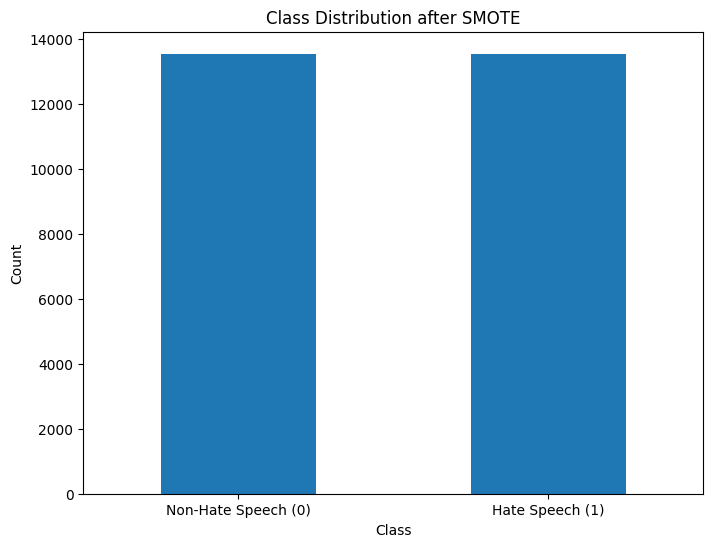

X_train_resampled_vectors shape: (27078, 300)
y_train_resampled shape: (27078,)


In [8]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled_vectors, y_train_resampled = smote.fit_resample(X_train_vectors, y_train)

# Display the new class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(Counter(y_train_resampled))

# Optional: Plot the new distribution
plt.figure(figsize=(8, 6))
pd.Series(y_train_resampled).value_counts().plot(kind='bar')
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

# Print shapes to confirm
print("X_train_resampled_vectors shape:", X_train_resampled_vectors.shape)
print("y_train_resampled shape:", y_train_resampled.shape)


In [9]:
import pandas as pd
import numpy as np

# Assuming you have already applied SMOTE and have X_train_resampled_vectors, y_train_resampled, X_test_vectors, y_test

# Convert X_train_resampled_vectors and X_test_vectors back to DataFrame format if needed
X_train_resampled_df = pd.DataFrame(X_train_resampled_vectors, columns=[f'vector_{i+1}' for i in range(X_train_resampled_vectors.shape[1])])
X_test_df = pd.DataFrame(X_test_vectors, columns=[f'vector_{i+1}' for i in range(X_test_vectors.shape[1])])

# Concatenate X_train_resampled_df with lemmatized_comment and save as train_data.csv
X_train_resampled_df = pd.concat([X_train_resampled_df, X_train['lemmatized_comment'].reset_index(drop=True)], axis=1)
train_data = pd.concat([X_train_resampled_df, y_train_resampled.reset_index(drop=True)], axis=1)
train_data.to_csv('train.csv', index=False)

# Concatenate X_test_df with lemmatized_comment and save as test_data.csv
X_test_df = pd.concat([X_test_df, X_test['lemmatized_comment'].reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test_df, y_test.reset_index(drop=True)], axis=1)
test_data.to_csv('test.csv', index=False)

print("Train and test data saved successfully.")


Train and test data saved successfully.
